In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plp
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/My Drive/data set/pokemon/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [5]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [6]:
df.drop(['#','Type 1','Total'],inplace = True, axis = 1)
df.head()

,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Poison,80,100,123,122,120,80,1,False
4,Charmander,NaN,39,52,43,60,50,65,1,False


In [7]:
df.rename(columns={'Name':'name',
                   'Type 2':'type2',
                   'HP' : 'hp',
                   'Attack':'atk',
                   'Defense':'def',
                   'Sp. Atk':'spAtk',
                   'Sp. Def':'spDef',
                   'Generation':'evo',
                   'Legendary':'legend'},inplace = True)
df.head()

,name,type2,hp,atk,def,spAtk,spDef,Speed,evo,legend
0,Bulbasaur,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Poison,80,100,123,122,120,80,1,False
4,Charmander,NaN,39,52,43,60,50,65,1,False


In [8]:
df['type2'] = df.type2.fillna('Uknown')
df.head()

,name,type2,hp,atk,def,spAtk,spDef,Speed,evo,legend
0,Bulbasaur,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Poison,80,100,123,122,120,80,1,False
4,Charmander,Uknown,39,52,43,60,50,65,1,False


In [9]:
df['legend'] = df['legend'].astype(int)
df.head()

,name,type2,hp,atk,def,spAtk,spDef,Speed,evo,legend
0,Bulbasaur,Poison,45,49,49,65,65,45,1,0
1,Ivysaur,Poison,60,62,63,80,80,60,1,0
2,Venusaur,Poison,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Poison,80,100,123,122,120,80,1,0
4,Charmander,Uknown,39,52,43,60,50,65,1,0


In [10]:
#sort acak
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#df['type2'] = le.fit_transform(df['type2'])

#sort by alfabet
df['type2'] = pd.factorize(df['type2'], sort=True)[0] + 1 

df.head()

,name,type2,hp,atk,def,spAtk,spDef,Speed,evo,legend
0,Bulbasaur,14,45,49,49,65,65,45,1,0
1,Ivysaur,14,60,62,63,80,80,60,1,0
2,Venusaur,14,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,14,80,100,123,122,120,80,1,0
4,Charmander,18,39,52,43,60,50,65,1,0


In [11]:
df['type2'].value_counts()

18    386
8      97
11     35
14     34
15     33
6      26
10     25
5      23
17     22
2      20
3      18
19     14
9      14
12     14
16     14
7      12
4       6
13      4
1       3
Name: type2, dtype: int64

In [12]:
y = df['legend'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [13]:
x = df[['type2','hp','atk','def','spAtk','spDef','Speed','evo']].values
x[0:5]

array([[ 14,  45,  49,  49,  65,  65,  45,   1],
       [ 14,  60,  62,  63,  80,  80,  60,   1],
       [ 14,  80,  82,  83, 100, 100,  80,   1],
       [ 14,  80, 100, 123, 122, 120,  80,   1],
       [ 18,  39,  52,  43,  60,  50,  65,   1]])

In [14]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[ 0.04419434, -0.95062622, -0.92490618, -0.79715364, -0.2391303 ,
        -0.24818854, -0.80150318, -1.39963712],
       [ 0.04419434, -0.3628221 , -0.5241302 , -0.34791742,  0.21955954,
         0.29115635, -0.28501525, -1.39963712],
       [ 0.04419434,  0.42091674,  0.09244823,  0.29384863,  0.83114599,
         1.01028289,  0.40363531, -1.39963712],
       [ 0.04419434,  0.42091674,  0.64736882,  1.57738071,  1.50389108,
         1.72940942,  0.40363531, -1.39963712],
       [ 0.8127915 , -1.18574787, -0.83241942, -0.98968346, -0.39202691,
        -0.78753344, -0.11285261, -1.39963712]])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print ('Train Set : ', x_train.shape, y_train.shape)
print ('Test Set :', x_test.shape, y_test.shape)

Train Set :  (640, 8) (640,)
Test Set : (160, 8) (160,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
k = 3
knn = KNeighborsClassifier(n_neighbors= k ).fit(x_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
test_model = knn.predict(x_test)
test_model[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [19]:
from sklearn import metrics
print('Train Set Accurasy : ',metrics.accuracy_score(y_train, knn.predict(x_train)))
print('Test Set Accurasy :', metrics.accuracy_score(y_test,test_model))

Train Set Accurasy :  0.9734375
Test Set Accurasy : 0.95


In [20]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfustionMx = [];
for n in range(1,ks):
        
        #train and predict
        KNeighborsClassifier(n_neighbors= n ).fit(x_train, y_train)
        test_model = knn.predict(x_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test,test_model)
        
        std_acc[n-1] = np.std(test_model==y_test)/np.sqrt(test_model.shape[0])
        
mean_acc

array([0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95])

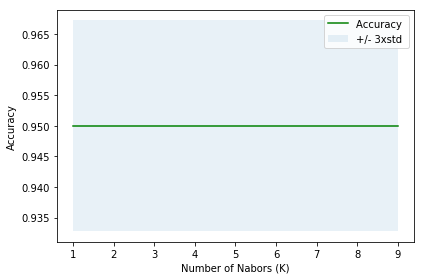

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()